# US Honey Case Study

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")

# Loading the Dataset

In [5]:
#loading the ds
df = pd.read_csv("US_honey_dataset.csv")

In [6]:
#printing the head
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [7]:
df.columns

Index(['Unnamed: 0', 'state', 'colonies_number', 'yield_per_colony',
       'production', 'stocks', 'average_price', 'value_of_production', 'year'],
      dtype='object')

In [8]:
#dropping the column Unnamed: 0	
df.drop(columns={"Unnamed: 0"},inplace=True)

In [9]:
#printing the head
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


# Summarizing the Data

In [11]:
#shape
df.shape

(1115, 8)

In [12]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [13]:
#checking null values count
df.isna().sum()

#0 null values

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [14]:
#duplicated values
df.duplicated().sum()

0

# Q1: 

## Find the state-wise production and state-wise average price for the top 5 and bottom 5 states, and visualize all four categories in a single figure.

## State Vs. Production

In [18]:
#columns name in a list
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

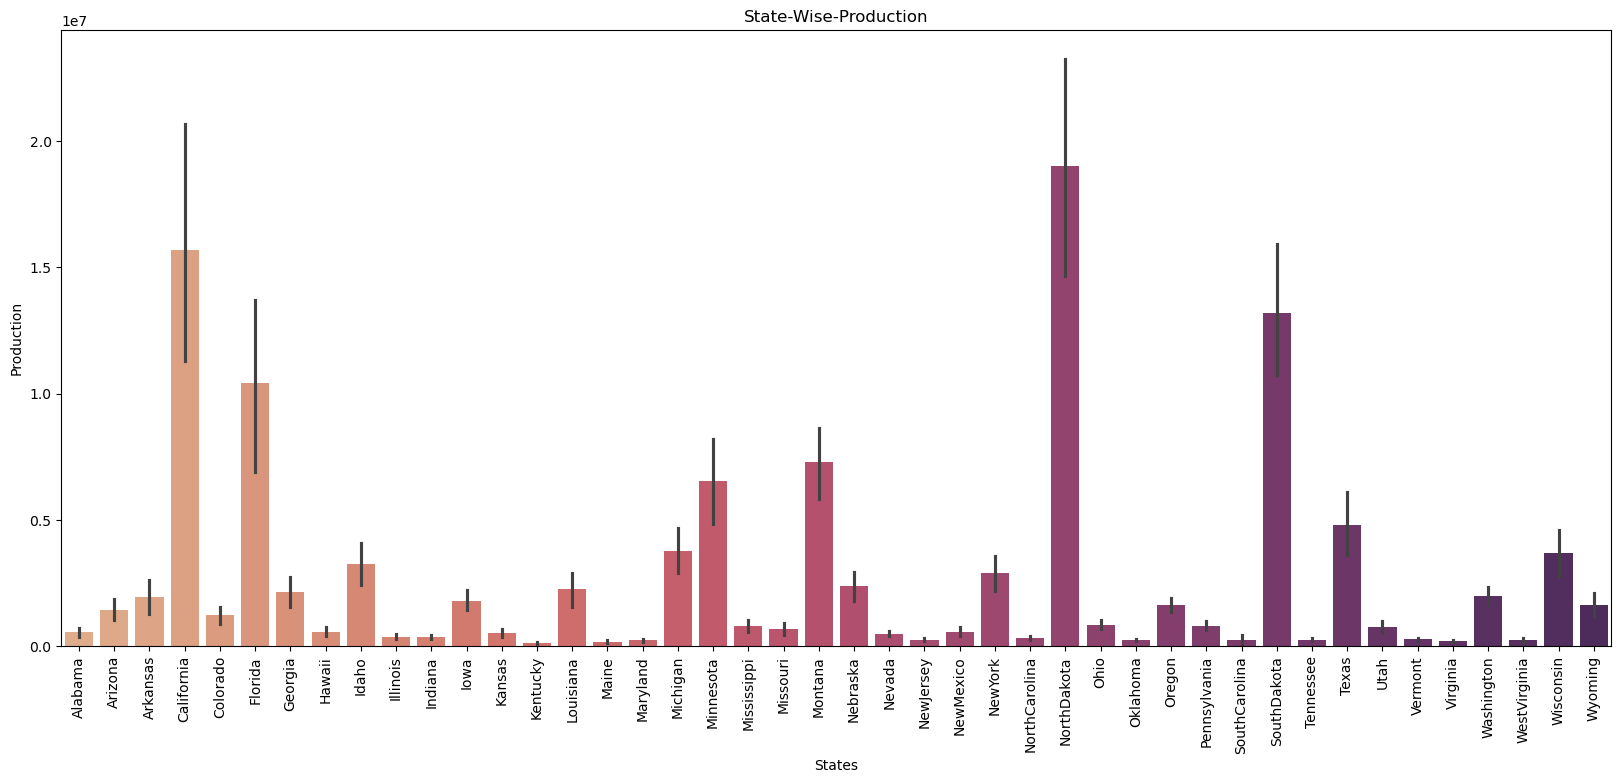

In [19]:
#plot a graph for statewise production of honey
plt.figure(figsize=(20,8))
sns.barplot(x='state',y='production', data=df ,palette='flare')
plt.title('State-Wise-Production')
plt.xlabel("States")
plt.ylabel("Production")
plt.xticks(rotation=90)
plt.savefig("State-Wise-Production.png")
plt.show()

NorthDakota is having the highest production.
the black line is representing the outliners but most of the values are in the coloured part

In [21]:
#top and bottom 5 states vs average_price, production
States_prod = df.groupby("state")['production'].sum().reset_index()
States_prod

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


## Top 5 states in Production

In [23]:
#top 5 values
Top_5_States_prod = States_prod.sort_values(by='production',ascending=False)[0:5]

In [24]:
Top_5_States_prod

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


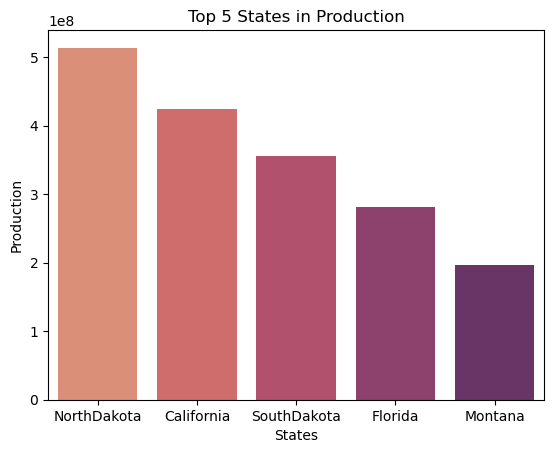

In [25]:
#creating bar plot
sns.barplot(x=Top_5_States_prod.state,y=Top_5_States_prod.production,palette="flare")
plt.xlabel("States")
plt.ylabel("Production")
plt.title("Top 5 States in Production")
plt.savefig("Top 5 States in Production")
plt.show()

## Bottom 5 states in Production

In [27]:
#same process for bottom
Bottom_5_Values = df.groupby('state')['production'].sum().reset_index()

In [28]:
Bottom_5_Values

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [29]:
Bottom_5_Values.sort_values(by='production',ascending=True)

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000
39,Virginia,5153000
41,WestVirginia,6411000
35,Tennessee,6857000
24,NewJersey,6913000
38,Vermont,7032000


In [30]:
Bot_5_Values_States_prod = Bottom_5_Values.sort_values('production',ascending=True)[0:5]

In [31]:
Bot_5_Values_States_prod

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


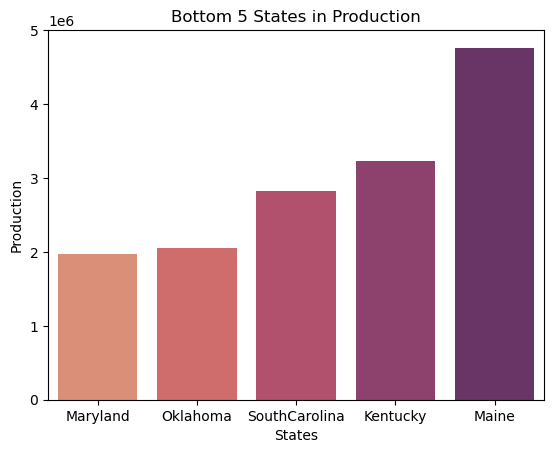

In [32]:
#plotting barplot
sns.barplot(x=Bot_5_Values_States_prod.state,y=Bot_5_Values_States_prod.production,palette='flare')
plt.xlabel("States")
plt.ylabel("Production")
plt.title("Bottom 5 States in Production")
plt.savefig("Bottom 5 States in Production.png")
plt.show()

In [34]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [35]:
#for States 
States_Avg_Price = df.groupby('state')['average_price'].sum().reset_index()

In [36]:
States_Avg_Price

,state,average_price
0,Alabama,4057.61
1,Arizona,2978.77
2,Arkansas,2870.45
3,California,2954.06
4,Colorado,3200.56
5,Florida,2967.52
6,Georgia,3260.68
7,Hawaii,3719.13
8,Idaho,2869.71
9,Illinois,5842.43


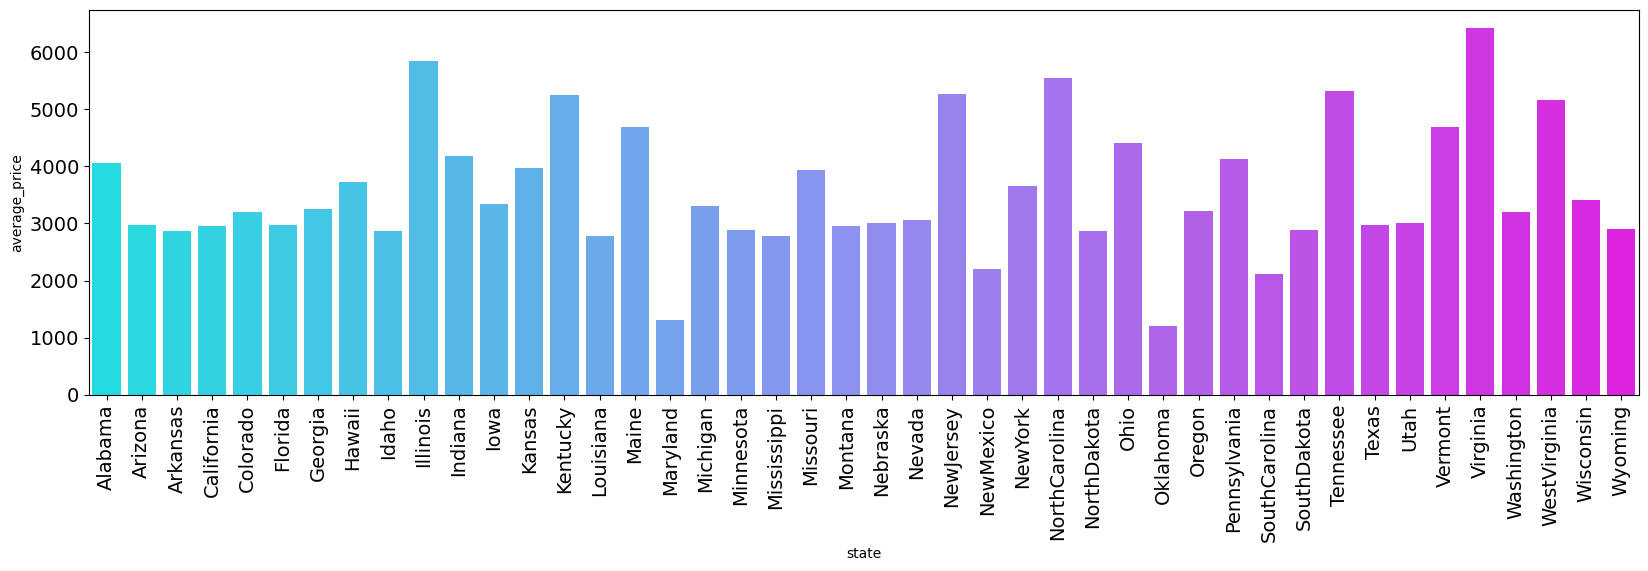

In [37]:
#plotting the bar
plt.figure(figsize=(20,5))
sns.barplot(x=States_Avg_Price.state,y=States_Avg_Price.average_price,palette='cool')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("State-Wise-Average-Price.png")
plt.show()

## Top 5 Average Price

In [39]:
#for top 5
Top_5_Avg_Price = States_Avg_Price.sort_values(by='average_price',ascending=False)[0:5]
Top_5_Avg_Price

,state,average_price
39,Virginia,6419.69
9,Illinois,5842.43
27,NorthCarolina,5540.21
35,Tennessee,5318.06
24,NewJersey,5262.74


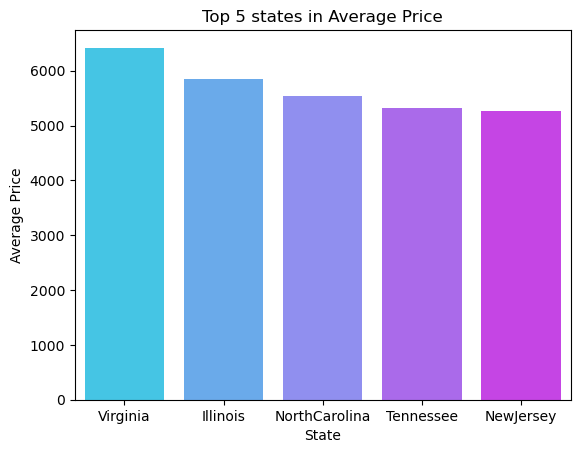

In [40]:
sns.barplot(x=Top_5_Avg_Price.state,y=Top_5_Avg_Price.average_price,palette='cool')
plt.xlabel("State")
plt.ylabel("Average Price")
plt.title("Top 5 states in Average Price")
plt.savefig("Top 5 states in Average Price.png")
plt.show()

## Bottom 5 Average Price

In [42]:
#for bottom 5
Bot_5_Avg_Price = States_Avg_Price.sort_values(by='average_price',ascending=True).reset_index()[0:5]
Bot_5_Avg_Price.drop('index',axis=1,inplace=True)
Bot_5_Avg_Price

,state,average_price
0,Oklahoma,1203.00
1,Maryland,1310.00
2,SouthCarolina,2111.96
3,NewMexico,2197.00
4,Mississippi,2776.70


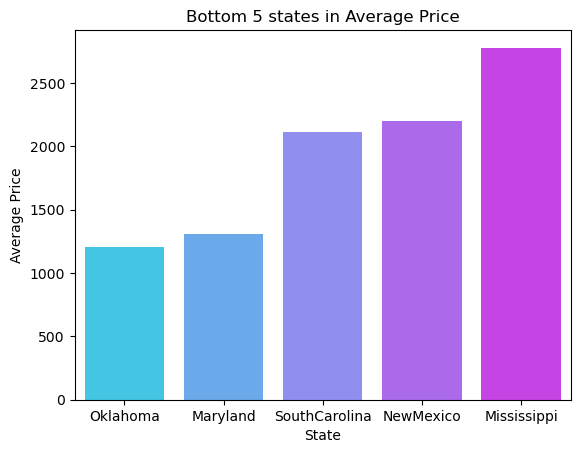

In [43]:
#plotting bar
sns.barplot(x=Bot_5_Avg_Price.state,y=Bot_5_Avg_Price.average_price,palette='cool')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Bottom 5 states in Average Price')
plt.savefig("Bottom 5 states in Average Price")
plt.show()

## All Barplots in 1

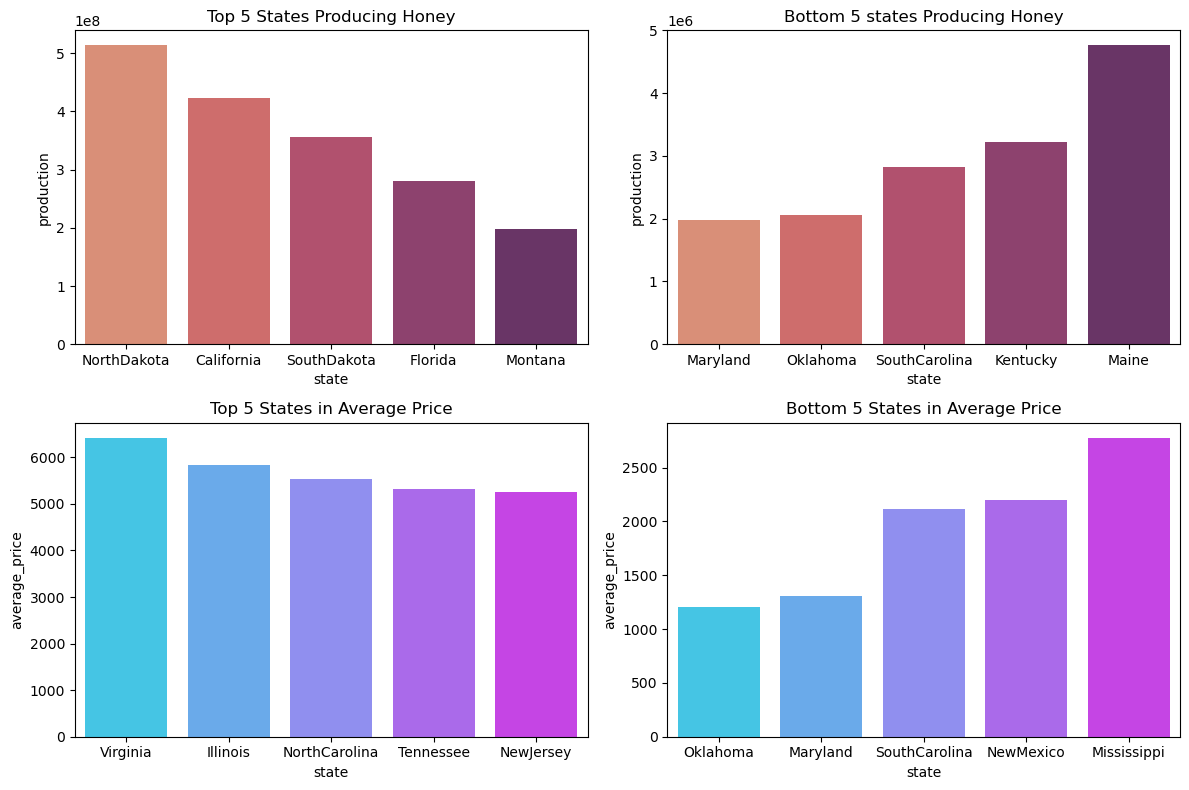

In [45]:
#plotting all 4 barplots in single fig using subplots
plt.figure(figsize=(12,8))

#top 5 in production
plt.subplot(2,2,1)
sns.barplot(x=Top_5_States_prod.state,y=Top_5_States_prod.production,palette='flare')
plt.title("Top 5 States Producing Honey")


#bottom 5 in prod
plt.subplot(2,2,2)
sns.barplot(x=Bot_5_Values_States_prod.state,y=Bot_5_Values_States_prod.production,palette='flare')
plt.title("Bottom 5 states Producing Honey")


#top 5 in average price
plt.subplot(2,2,3)
sns.barplot(x=Top_5_Avg_Price.state,y = Top_5_Avg_Price.average_price,palette='cool')
plt.title('Top 5 States in Average Price')


#bottom 5 in average price
plt.subplot(2,2,4)
sns.barplot(x=Bot_5_Avg_Price.state,y=Bot_5_Avg_Price.average_price,palette='cool')
plt.title("Bottom 5 States in Average Price")

plt.tight_layout()
plt.savefig("Combined.png")
plt.show()

## Year V/s Avg Price , Production

### Avg Price

In [48]:
#for avg_price
Year_Avg_Price = df.groupby('year')['average_price'].sum().reset_index()

In [49]:
Year_Avg_Price

,year,average_price
0,1995,3293.00
1,1996,4381.00
2,1997,3927.00
3,1998,3600.00
4,1999,3454.00
5,2000,3398.00
6,2001,3804.00
7,2002,5861.00
8,2003,6647.00
9,2004,5294.00


In [50]:
#unique years
df.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021], dtype=int64)

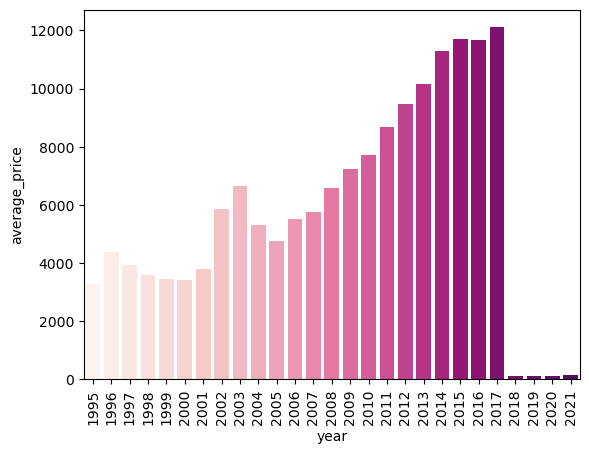

In [51]:
#plotting barplot
sns.barplot(x=Year_Avg_Price.year,y=Year_Avg_Price.average_price,palette='RdPu')
plt.xticks(rotation=90)
plt.show()

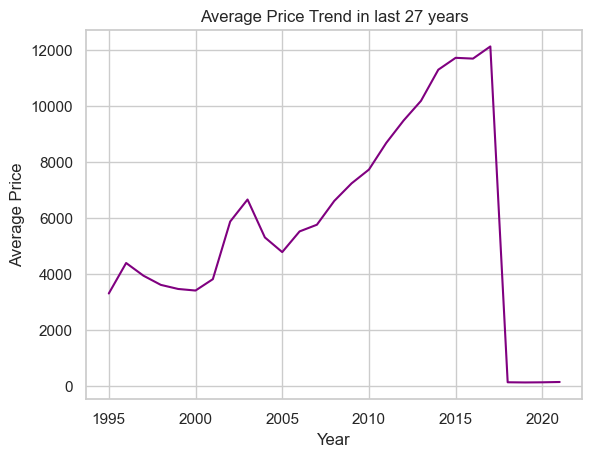

In [52]:
#plotting lineplot
sns.set(style = 'whitegrid')
sns.lineplot(x=Year_Avg_Price.year,y=Year_Avg_Price.average_price,color='purple')
plt.title('Average Price Trend in last 27 years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

### Conclusion:

### Prod

In [55]:
#for Prod
Year_Prod = df.groupby('year')['production'].sum().reset_index()
Year_Prod

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


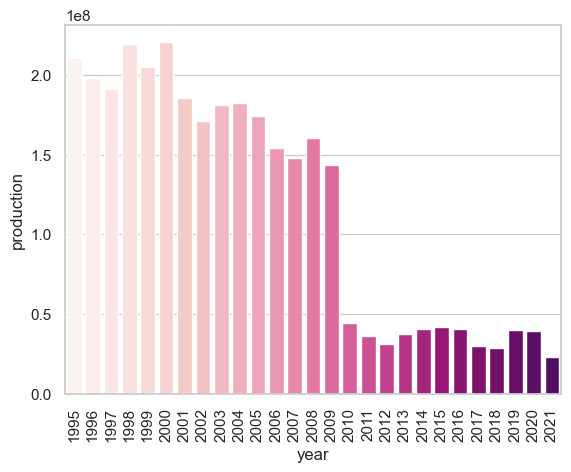

In [56]:
#plotting barplot
sns.barplot(x=Year_Prod.year,y=Year_Prod.production,palette='RdPu')
plt.xticks(rotation=90)
plt.show()

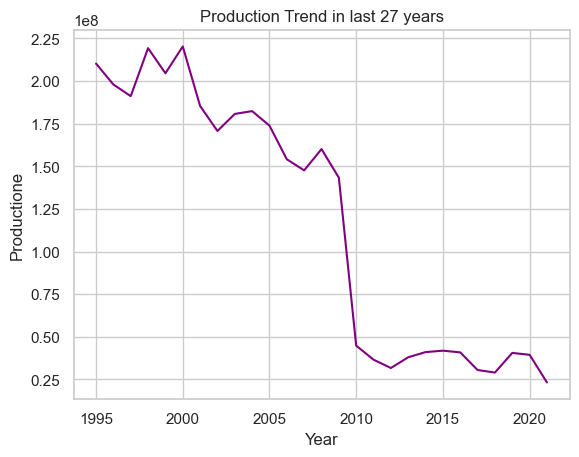

In [57]:
#plotting lineplot
sns.set(style = 'whitegrid')
sns.lineplot(x=Year_Prod.year,y=Year_Prod.production,color='purple')
plt.title('Production Trend in last 27 years')
plt.xlabel('Year')
plt.ylabel('Productione')
plt.show()

### Conclusion:

# Q2:

## Which states are rarely contributing to honey production for the last 27 years?

In [61]:
#cols
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [62]:
#for rarely contributed
df_rarely_contri = df.groupby(['state','year'])['production'].sum().reset_index()
df_rarely_contri

,state,year,production
0,Alabama,1995,928000
1,Alabama,1996,1024000
2,Alabama,1997,924000
3,Alabama,1998,1136000
4,Alabama,1999,1156000
...,...,...,...
1110,Wyoming,2017,186000
1111,Wyoming,2018,175000
1112,Wyoming,2019,306000
1113,Wyoming,2020,608000


In [63]:
bot_rarely_contri = df_rarely_contri.sort_values(by='production',ascending=True).reset_index()[0:5]
bot_rarely_contri.drop('index',axis=1,inplace=True)
bot_rarely_contri

,state,year,production
0,Kentucky,2011,12000
1,Alabama,2015,13000
2,Alabama,2018,14000
3,SouthCarolina,2018,15000
4,Maine,2011,17000


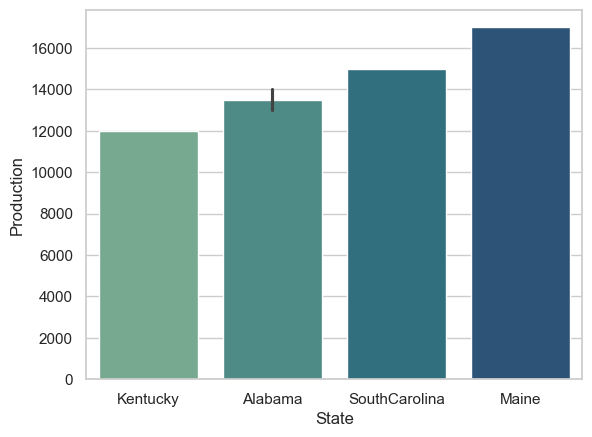

In [64]:
#Plotting bar
sns.barplot(x=bot_rarely_contri.state,y=bot_rarely_contri.production,palette='crest')
plt.xlabel('State')
plt.ylabel('Production')
plt.savefig("Q2.png")
plt.show()

# Q3

## Which are the top 5 Honey producing states in the US ?

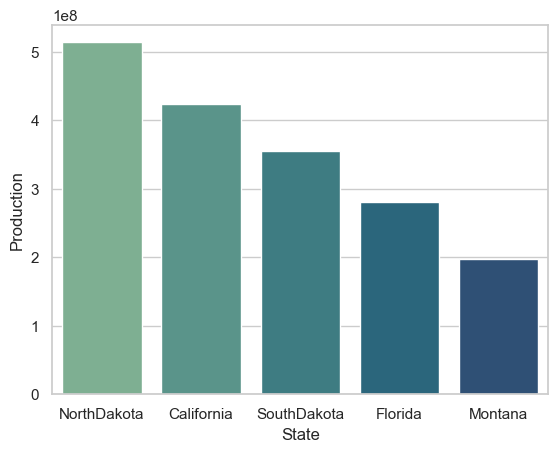

In [67]:
#already prepared the data in Q1
#just plotting barplot
sns.barplot(x=Top_5_States_prod.state,y=Top_5_States_prod.production,palette='crest')
plt.xlabel("State")
plt.savefig('Q3.png')
plt.ylabel("Production")
plt.show()

# Q4

## What is the Change in mean Average price of Honey from 1995 to 2021?

In [70]:
#for mean Avg Price
mean_change_avg = df.groupby('year')['average_price'].mean().reset_index()

In [71]:
mean_change_avg

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


In [72]:
change = mean_change_avg.average_price[0] - mean_change_avg.average_price[26]
change

71.5066590909091

# Q5

## Which was the year when production of Honey in wholeUS was the highest?

In [75]:
#printing the year and prod
highest_prod = df.groupby(['year'])['production'].sum().reset_index()
highest_prod_year = highest_prod.sort_values(by='production',ascending=False).head(1)
highest_prod_year

,year,production
5,2000,220320000


# Q6

##  which state was having highest contribution in tha year in productionr

In [78]:
high_state_prod = df.groupby('state')['production'].sum().reset_index()
high_prod_year = high_state_prod.sort_values(by='production',ascending=False).reset_index()
high_prod_year.drop('index',axis=1,inplace=True)
high_prod_year.head(1)

,state,production
0,NorthDakota,513742000


# Q7

## Which states have the highest no. of colonies in the year 2000

In [81]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [82]:
max_col_states = df.groupby(['state','year'])['colonies_number'].sum().reset_index()
max_col_states

,state,year,colonies_number
0,Alabama,1995,16000
1,Alabama,1996,16000
2,Alabama,1997,14000
3,Alabama,1998,16000
4,Alabama,1999,17000
...,...,...,...
1110,Wyoming,2017,39000
1111,Wyoming,2018,39000
1112,Wyoming,2019,39000
1113,Wyoming,2020,38000


In [83]:
max_col_states_in_2000 = max_col_states.loc[(max_col_states.year == 2000)]
max_col_states_in_2000

,state,year,colonies_number
5,Alabama,2000,16000
32,Arizona,2000,40000
59,Arkansas,2000,55000
86,California,2000,440000
113,Colorado,2000,29000
140,Florida,2000,232000
167,Georgia,2000,55000
194,Hawaii,2000,7000
221,Idaho,2000,100000
248,Illinois,2000,8000


In [84]:
#getting the max value
maxim = max_col_states_in_2000.loc[(max_col_states_in_2000.colonies_number==max_col_states_in_2000.colonies_number.max())]

In [85]:
maxim

,state,year,colonies_number
86,California,2000,440000


In [86]:
#for visualizing
maxim_col_states = max_col_states_in_2000.sort_values(by='colonies_number',ascending=False)[0:5]

In [87]:
maxim_col_states

,state,year,colonies_number
86,California,2000,440000
721,NorthDakota,2000,290000
850,SouthDakota,2000,235000
140,Florida,2000,232000
472,Minnesota,2000,150000


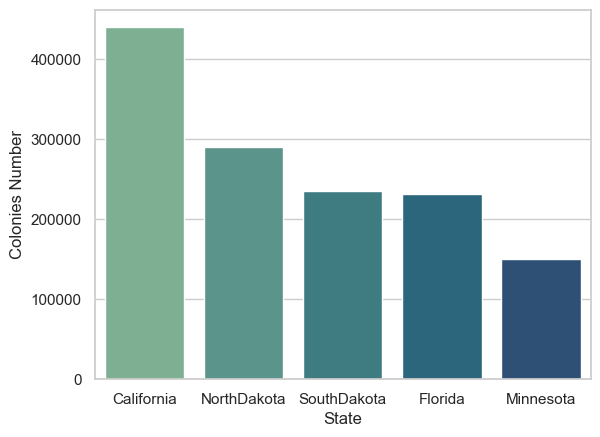

In [88]:
#plotting barplot
sns.barplot(x=maxim_col_states.state,y=maxim_col_states.colonies_number,palette='crest')
plt.xlabel('State')
plt.ylabel('Colonies Number')
plt.savefig("States with Highest colonies in 2020.png")
plt.show()